<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6231/NGC_6231_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 3.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 2.6MB 45.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=28f103969d8ea2470290d17d1e1ec621ad126b46b07a2fb5647e6694d6b532b3
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC6231 center

coordinate = coord.SkyCoord.from_name('NGC6231')
print(coordinate)
radius = u.Quantity(1, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (253.53545833, -41.82666667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 5966509846818679680,5966509846818679680,1361430196,2015.5,253.535948,0.129177,-41.828117,0.101217,0.373578,0.109698,3.405523,-0.251845,0.303577,-2.123356,0.177563,0.543667,0.280317,-0.585969,-0.507726,0.059835,-0.583171,-0.779288,-0.322748,0.024545,0.605362,170,0,170,0,2.905045,222.783508,0.323814,2.596213,31,False,2.333645,1.413386,0.022658,0.190977,...,4514.689181,851.515446,5.301946,15.625350,2.803340,0,0.745122,-0.622978,1.368100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459247,1.185433,257.084064,-19.124220,102011,5095.633301,4297.5,6938.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001498
1,1635721458409799680,Gaia DR2 5966509851108054016,5966509851108054016,111247073,2015.5,253.533661,0.400825,-41.825672,0.424710,-0.745005,0.652348,-1.142036,-2.222224,1.098430,-6.834229,1.054830,-0.060677,0.309571,0.159486,0.270091,-0.647966,-0.220034,-0.585373,0.290158,0.684820,0.604562,116,0,115,1,2.225698,145.619812,1.076680,1.766340,31,False,0.159604,1.353609,0.104962,0.016528,...,550.797062,30.571649,18.016596,17.909441,3.044842,0,0.624971,-0.775417,1.400389,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.460069,1.188297,257.081964,-19.121996,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001671
2,1635721458409799680,Gaia DR2 5966509846818678528,5966509846818678528,1212321597,2015.5,253.534740,2.762316,-41.828398,2.171251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,0,70,2,4.288782,126.146980,1.594898,7.140488,3,False,0.212628,NaN,NaN,0.214469,...,1413.189375,18.443649,76.622009,16.886419,2.236178,0,1.848509,0.344460,1.504049,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458461,1.185955,257.083154,-19.124606,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001818
3,1635721458409799680,Gaia DR2 5966509851122012288,5966509851122012288,1592357776,2015.5,253.534654,13.799354,-41.829497,4.608760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,0,77,2,3.241103,117.390808,1.090626,4.188075,3,False,0.319843,NaN,NaN,0.118872,...,1213.376667,189.336804,6.408562,17.051931,2.098466,0,1.798573,0.375666,1.422907,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.457567,1.185312,257.083224,-19.125705,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002899
4,1635721458409799680,Gaia DR2 5966509782401686400,5966509782401686400,1496891344,2015.5,253.538409,7.983613,-41.828788,2.592427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.772609,NaN,NaN,NaN,N

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [9]:
all_stars_filtered.shape

(63286, 99)

##### Visualizing GAIA data

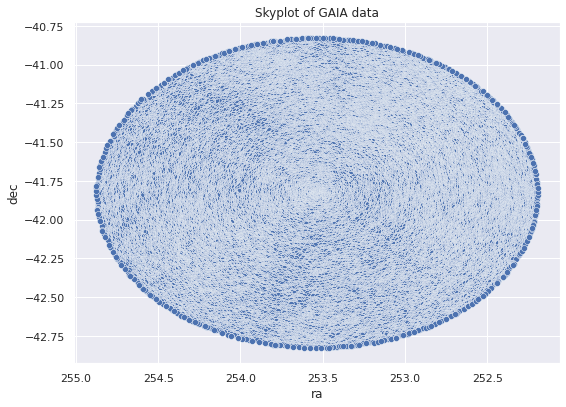

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only NGC 6231 data from Cantat GAIA DR2 paper

cantat_6231 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6231")
cantat_6231 = cantat_6231[0].to_pandas()
cantat_6231

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,253.132848,-41.861961,5965017465938774912,0.6620,-0.563,-2.369,NaN,14.281500,1.2256,0.7,NGC_6231,253.132851,-41.861951
1,253.201303,-41.955200,5965015919750155776,0.5506,-0.890,-2.207,NaN,13.564100,0.8036,0.4,NGC_6231,253.201309,-41.955191
2,253.168852,-41.849690,5965017397219299456,0.7014,-0.938,-2.106,NaN,15.016800,1.3637,0.5,NGC_6231,253.168857,-41.849681
3,253.195016,-41.919190,5965016405090411904,0.4986,-0.456,-2.189,NaN,16.772200,1.8739,0.6,NGC_6231,253.195019,-41.919181
4,253.169682,-41.909035,5965016783047540608,0.5738,-0.563,-1.944,NaN,15.530700,1.6979,0.4,NGC_6231,253.169685,-41.909027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,253.799898,-42.188102,5966448003577519616,0.5505,-0.183,-2.782,NaN,17.665400,1.7170,0.2,NGC_6231,253.799899,-42.188090
1576,253.928626,-42.079932,5966453054470707072,0.6383,-0.194,-1.632,NaN,17.237301,2.8719,0.1,NGC_6231,253.928627,-42.079925
1577,253.841437,-42.065966,5966450340039976064,0.4553,-1.162,-2.968,NaN,17.821899,1.9168,0.2,NGC_6231,253.841444,-42.065953
1578,253.802264,-42.156706,5966450374411114752,0.6002,-0.381,-2.346,NaN,14.170600,1.0223,1.0,NGC_6231,253.802266,-42.156696


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_6231 = cantat_6231.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_6231 = cantat_6231.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_6231 = all_stars_filtered.join(cantat_6231.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6231 = cantat_6231.dropna(subset=['PMemb'])
cantat_6231

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
19,1635721458409799680,Gaia DR2 5966509846818671872,5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,9.281498,1.170590,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459803,1.192602,257.077960,-19.119925,100002,8385.000000,8145.500000,8634.250000,0.8830,0.7589,1.0181,0.4583,0.3856,0.5190,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005984,7.472460,33.461019,0.6
29,1635721458409799680,Gaia DR2 5966509885480897792,5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,9.886769,1.174598,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464262,1.180180,257.091598,-19.122782,100001,8046.500000,7834.000000,8446.000000,0.6690,0.4880,1.0634,0.3483,0.2662,0.5140,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007647,6.887798,26.786451,0.5
33,1635721458409799680,Gaia DR2 5966509782401678592,5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,12.925723,1.211719,0,0.516440,0.171193,0.345247,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458147,1.178751,257.089426,-19.128715,100001,7098.750000,6948.500000,7812.333496,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.258261,1.864560,2.356980,11.667307,9.715938,13.618676,https://gea.esac.esa.int/data-server/datalink/...,,0.008128,4.097861,44.208088,0.7
34,1635721458409799680,Gaia DR2 5966509816761433344,5966509816761433344,1422996716,2015.5,253.524722,0.052448,-41.829070,0.039512,0.679599,0.051644,13.159428,-0.391171,0.090270,-2.035686,0.065084,-0.095738,-0.359208,-0.498299,-0.008629,0.001924,0.044416,-0.752808,0.006862,0.143410,-0.146632,188,188,182,6,12.566249,532.939697,0.000000,0.035609,31,False,403.098267,1.709013,0.009345,0.008820,...,11.436303,1.190724,0,0.358126,0.116549,0.241577,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.453231,1.191324,257.075394,-19.126164,100001,7927.000000,7478.000000,8380.750000,

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6231.to_csv('NGC_6231_cantat.csv')
# all_stars.to_csv('NGC_6231_Gaia_30m.csv')

In [19]:
cantat_6231.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,9.810000e+02,9.810000e+02,9.810000e+02,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,9.750000e+02,975.000000,975.000000,975.000000,975.000000,981.000000,975.000000,975.000000,975.000000,9.000000,9.000000,981.000000,9.000000,9.000000,9.000000,981.000000,981.000000,981.000000,981.000000,855.000000,855.000000,855.000000,855.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,695.0,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,981.000000,981.000000,981.000000,981.000000
mean,1.635721e+18,5.966748e+18,8.652417e+08,2015.5,253.521934,0.058585,-41.788717,0.049121,0.586136,0.067603,11.212946,-0.718338,0.119377,-2.191056,0.085998,0.054932,-0.183105,-0.345898,-0.081842,-0.274248,0.016880,-0.732198,-0.149305,0.363582,-0.047871,208.194699,41.877676,206.264016,1.930683,1.839809,266.675720,0.069794,1.188554,31.0,76.657822,1.509613,0.011632,0.091111,23.763507,11.287462,...,2.456457e+05,700.080556,532.041321,13.895763,1.313738,0.132518,1.362973,0.624728,0.738244,-40.064345,2.654596,0.053007,4944.444336,3.055556,-0.166667,343.483047,1.218310,257.068101,-19.086473,100092.362573,5338.688965,5112.984863,5677.572754,1.787058,1.476716,2.084814,0.898239,0.738097,1.051885,200111.0,3.624494,3.232256,3.924859,59.072506,51.042259,67.102707,0.213207,7.321942,32.893158,0.568909
std,0.000000e+00,1.046724e+15,4.754798e+08,0.0,0.213898,0.031572,0.190065,0.026230,0.074388,0.038268,5.302892,0.291821,0.071913,0.311168,0.048582,0.176350,0.153910,0.171048,0.148750,0.146481,0.157234,0.077975,0.122019,0.121895,0.215260,29.180400,85.495801,28.546429,3.030001,5.864827,226.340103,0.133284,4.862019,0.0,108.574928,0.127500,0.006817,0.053900,3.316184,0.861261,...,1.549623e+06,5122.013958,413.106323,1.947901,0.126057,0.353947,0.702157,0.409019,0.308357,43.334732,4.961407,0.602074,634.647766,0.166667,0.500000,0.166179,0.184263,0.172635,0.186925,417.513729,1405.713867,1360.727905,1439.526123,0.742497,0.764570,0.755237,0.376365,0.386449,0.386517,0.0,4.075085,3.747126,4.311942,457.660889,392.118591,523.401550,0.132596,3.652877,15.635586,0.318833
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.277864,0.018408,0.425329,0.023862,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.854753,-0.750324,-0.826485,-0.971674,-0.709552,-0.185073,-0.868255,66.00000

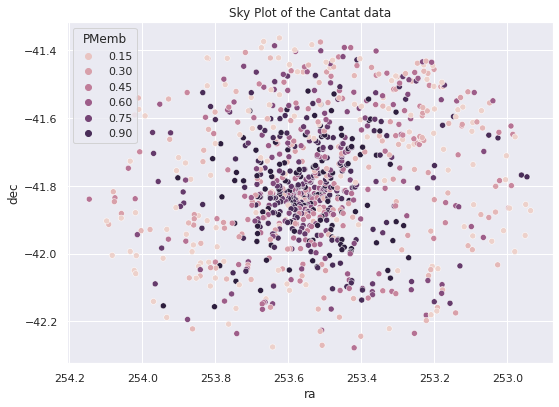

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_6231['ra'], y = cantat_6231['dec'], 
                          hue = cantat_6231['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_6231.copy()

In [22]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_6231_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_6231_center)
cantat_radius

0.4674183335414037

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
19,1635721458409799680,Gaia DR2 5966509846818671872,5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459803,1.192602,257.077960,-19.119925,100002,8385.000000,8145.50,8634.250000,0.883,0.7589,1.0181,0.4583,0.3856,0.5190,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005984,7.472460,33.461019,0.6,0.005981,1
29,1635721458409799680,Gaia DR2 5966509885480897792,5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464262,1.180180,257.091598,-19.122782,100001,8046.500000,7834.00,8446.000000,0.669,0.4880,1.0634,0.3483,0.2662,0.5140,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007647,6.887798,26.786451,0.5,0.007654,1
33,1635721458409799680,Gaia DR2 5966509782401678592,5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,0,0.516440,0.171193,0.345247,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458147,1.178751,257.089426,-19.128715,100001,7098.750000,6948.50,7812.333496,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.258261,1.864560,2.356980,11.667307,9.715938,13.618676,https://gea.esac.esa.int/data-server/datalink/...,,0.008128,4.097861,44.208088,0.7,0.008129,1
34,1635721458409799680,Gaia DR2 5966509816761433344,5966509816761433344,1422996716,2015.5,253.524722,0.052448,-41.829070,0.039512,0.679599,0.051644,13.159428,-0.391171,0.090270,-2.035686,0.065084,-0.095738,-0.359208,-0.498299,-0.008629,0.001924,0.044416,-0.752808,0.006862,0.143410,-0.146632,188,188,182,6,12.566249,532.939697,0.000000,0.035609,31,False,403.098267,1.709013,0.009345,0.008820,...,0,0.358126,0.116549,0.241577,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.453231,1.191324,257.075394,-19.126164,100001,7927.000000,7478.00,8380.750000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.156079,2.823578,3.546457,35.434467,31.764431

In [25]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_6231_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_6231_center'] >= 0.95].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member
653069,1635721458409799680,Gaia DR2 5968046929715635968,5968046929715635968,976056454,2015.5,252.219172,0.089445,-42.028037,0.074504,0.493301,0.094648,5.211943,-1.532096,0.186793,-2.453836,0.126001,0.213739,0.059654,-0.438826,-0.233385,-0.293616,-0.199844,-0.743825,-0.224180,0.334527,0.123452,223,0,221,2,0.064566,216.676010,0.000000,0.000000,31,False,2.742725,1.410080,0.017841,0.077536,...,1.381003,0,1.966192,0.958464,1.007729,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,342.681116,1.813617,256.080476,-19.444140,100001,4020.370117,3761.000000,4479.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.999793,8.202123,19.474773,0.998281,0
627286,1635721458409799680,Gaia DR2 5968106406417886464,5968106406417886464,1365201733,2015.5,252.411785,0.068275,-41.320548,0.058156,0.446328,0.077757,5.740068,1.068688,0.130460,-5.706807,0.093935,-0.003847,-0.057402,-0.463475,-0.066834,-0.256762,-0.006688,-0.796134,-0.223471,0.413626,-0.154870,235,0,235,0,10.212743,524.773804,0.328565,11.212136,31,False,5.595661,1.219775,0.014248,0.076643,...,1.555455,0,3.090322,1.787637,1.302685,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.316431,2.157273,256.135738,-18.724062,100001,4344.069824,3669.449951,4816.274902,2.8950,2.8030,2.9510,1.4580,1.4160,1.4848,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.981218,8.191716,60.752810,0.984042,0
623115,1635721458409799680,Gaia DR2 5969584772851823488,5969584772851823488,864285139,2015.5,253.500297,0.130530,-40.848859,0.092657,0.645748,0.143506,4.499807,-3.398539,0.284692,-9.943752,0.164353,-0.230967,-0.470688,-0.347151,0.172459,0.104421,0.237699,-0.691223,0.199900,0.048891,-0.128498,176,0,175,1,1.184175,192.059235,0.165035,0.475286,31,False,1.927962,1.353122,0.021675,0.032569,...,1.439039,0,2.188709,1.091181,1.097528,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,344.202617,1.823752,256.932925,-18.155120,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.978160,11.937605,60.502376,0.978170,0
599579,1635721458409799680,Gaia DR2 5969605899760553344,5969605899760553344,465730865,2015.5,252.894786,0.061777,-40.994683,0.053836,0.228546,0.072644,3.146108,-0.998707,0.119243,-4.081221,0.090165,0.152602,0.001907,-0.490895,-0.160119,-0.339218,-0.062974,-0.794639,-0.269932,0.439427,-0.033699,257,0,257,0,23.430239,1226.956665,0.398930,34.110731,31,False,5.623558,1.204455,0.011584,0.112819,...,1.549806,0,3.217729,1.908017,1.309711,7.717396,1.247342,2,4000.0,3.0,0.0,NOT_AVAILABLE,343.799739,2.085425,256.473288,-18.355269,100001,3446.736572,3283.666748,3770.209961,2.3807,2.2014,2.5328,1.2373,1.1613,1.3306,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


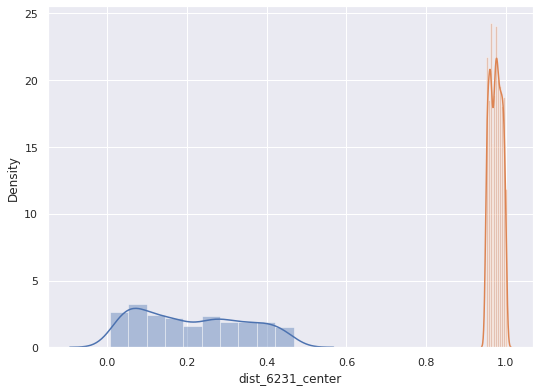

In [28]:
sns.distplot(member['dist_6231_center'])
sns.distplot(non_member['dist_6231_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,1.962000e+03,1.962000e+03,1.962000e+03,1962.0,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.0,1962.000000,1962.000000,1962.000000,1962.000000,1962.00000,1962.000000,...,1938.000000,1938.000000,1938.000000,1962.000000,1938.000000,1938.000000,1938.000000,35.000000,35.000000,1962.000000,35.000000,35.000000,35.000000,1962.000000,1962.000000,1962.000000,1962.000000,1385.000000,1385.000000,1385.000000,1385.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,1027.0,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1962.000000,1962.000000,1962.000000,981.000000,1962.000000,1962.000000
mean,1.635721e+18,5.967097e+18,8.599443e+08,2015.5,253.436536,0.100795,-41.770010,0.081349,0.770933,0.109568,10.162286,-1.702239,0.208556,-3.540393,0.141500,0.082669,-0.136682,-0.363718,-0.106592,-0.254681,-0.033921,-0.736026,-0.153735,0.345620,-0.010153,205.838430,23.934760,204.275739,1.562691,2.225807,277.541626,0.175167,2.299732,31.0,45.436680,1.466154,0.019118,0.093089,23.48369,11.268094,...,423.033020,14.792759,1.371154,0.116208,1.600414,0.740604,0.859810,-30.288648,1.885091,0.099388,4842.856934,3.014286,-0.050000,343.455930,1.278431,256.998981,-19.076600,100094.989892,4976.429688,4761.697266,5305.239258,1.737776,1.451552,2.025641,0.872425,0.722993,1.020299,200111.0,3.365418,2.999820,3.643896,41.969952,36.259819,47.680122,0.593877,14.937201,39.086497,0.568909,0.593961,0.500000
std,0.000000e+00,1.359425e+15,4.798487e+08,0.0,0.673431,0.124640,0.496119,0.090818,0.759832,0.121907,8.880339,4.105279,0.282489,5.868450,0.166680,0.191771,0.165779,0.178310,0.173204,0.163394,0.195036,0.075004,0.122416,0.136650,0.233819,26.519116,67.672237,26.114074,2.487786,6.094354,281.014130,0.417243,9.553974,0.0,88.718323,0.121757,0.021107,0.053190,3.01754,0.858406,...,375.786835,1.961255,0.211028,0.346546,0.660771,0.398934,0.300716,36.685897,3.616230,0.826517,639.064514,0.392685,0.255815,0.488399,0.509779,0.533808,0.493773,423.115465,1247.155029,1214.550903,1273.397949,0.780422,0.796704,0.787784,0.396726,0.402983,0.402754,0.0,4.149939,3.790927,4.428089,377.478546,323.459442,431.662781,0.392268,27.598942,62.639625,0.318833,0.392338,0.500127
min,1.635721e+18,5.964736e+18,1.993672e+06,2015.5,252.196525,0.021023,-42.824347,0.018408,0.208890,0.022623,3.001803,-56.300507,0.042337,-184.863000,0.031957,-0.869595,-0.850281,-0.911893,-0.854753,-0.787695,-0.826485,-0.978844

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,1962.000000,1962.000000,1962.000000
mean,0.770933,-1.702239,-3.540389
std,0.759832,4.105278,5.868451
min,0.208890,-56.300507,-184.863007
25%,0.532500,-2.330204,-3.814928
50%,0.605848,-0.879877,-2.342295
75%,0.719882,-0.542439,-2.008537
max,11.901221,60.691586,13.632515


In [33]:
targets.value_counts()

1    981
0    981
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


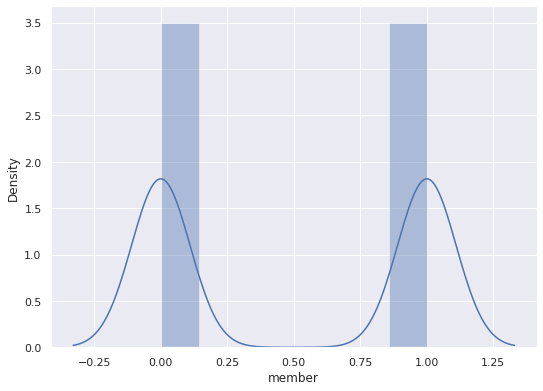

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

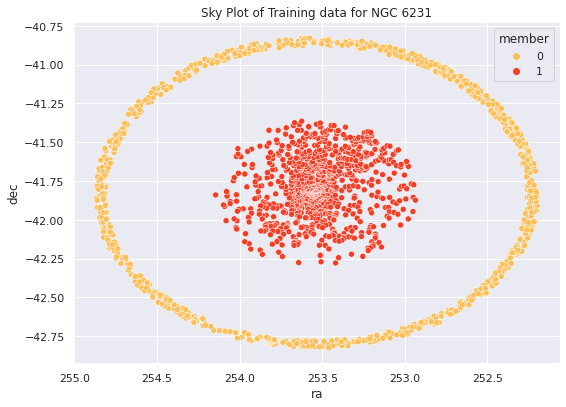

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 6231')
plt.show()

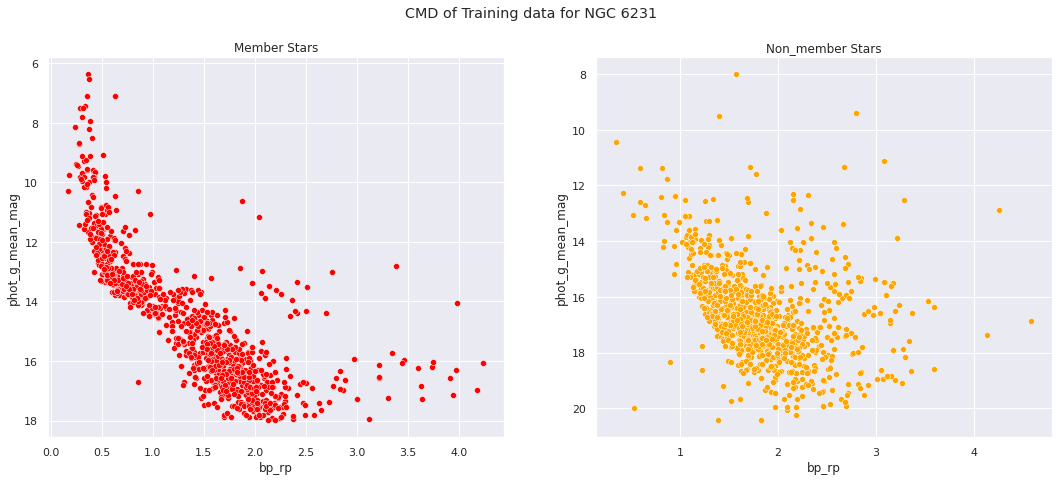

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 6231 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


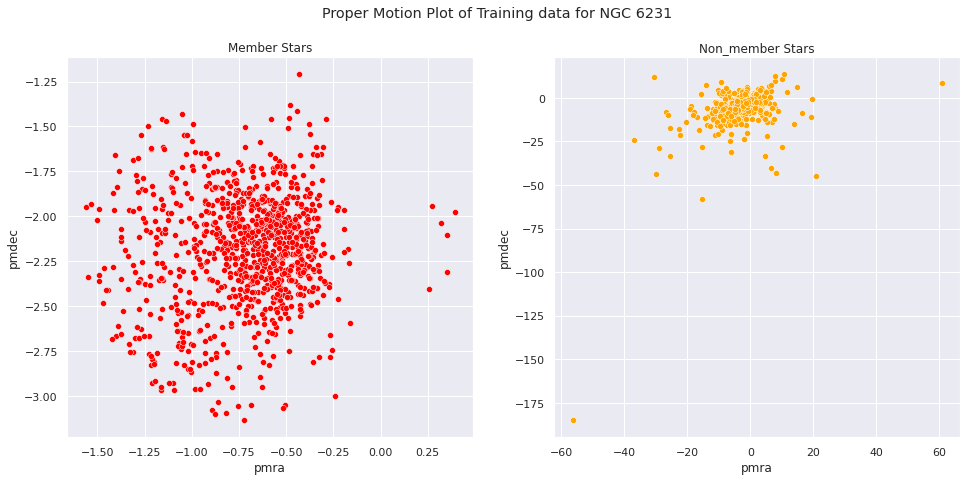

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 6231 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


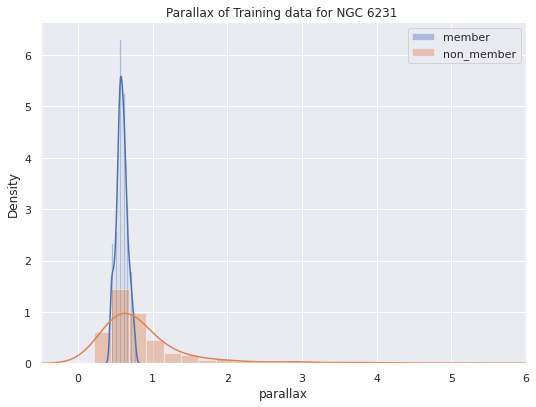

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 6231 ')
plt.legend()
plt.show()

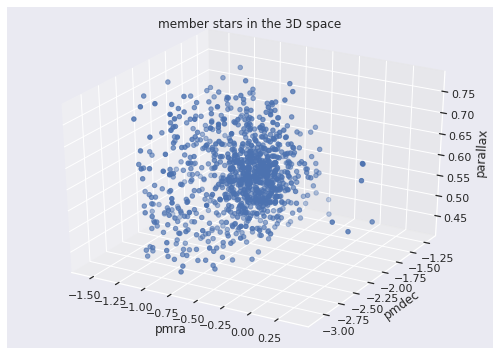

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


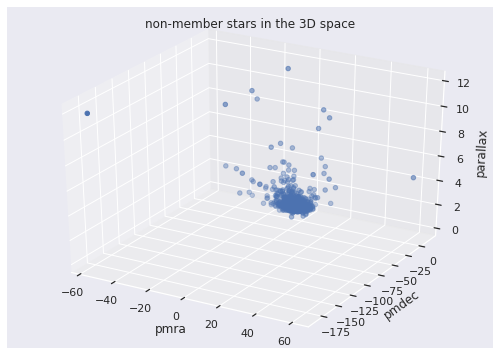

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.387056
pmdec       0.385976
parallax    0.226968
dtype: float64

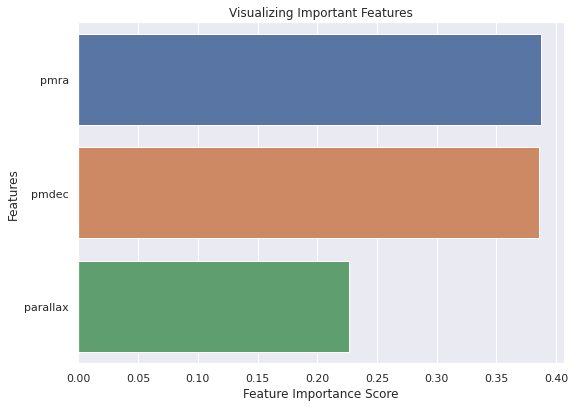

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [81]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [82]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [83]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [84]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.958
Accuracy on test data: 0.968


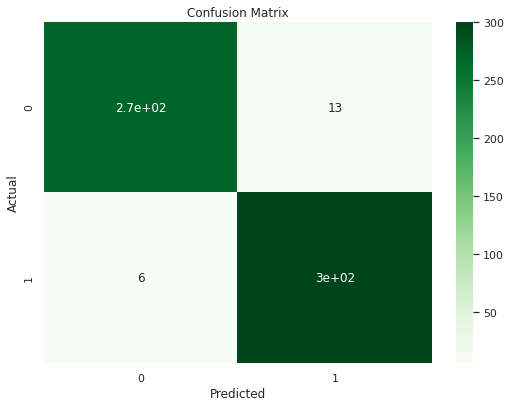

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       283
           1       0.96      0.98      0.97       306

    accuracy                           0.97       589
   macro avg       0.97      0.97      0.97       589
weighted avg       0.97      0.97      0.97       589



In [85]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.960
Precision on testing data: 0.962
Accuracy on test data: 0.975


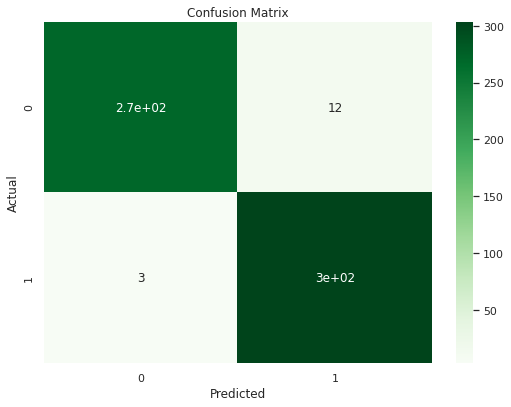

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       283
           1       0.96      0.99      0.98       306

    accuracy                           0.97       589
   macro avg       0.98      0.97      0.97       589
weighted avg       0.97      0.97      0.97       589



In [86]:
best_random = rfc_random.best_estimator_

evaluate_model(best_random)


### Prediction for the new stars

In [87]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center
count,6.328600e+04,6.328600e+04,6.328600e+04,63286.0,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.000000,63286.0,63286.000000,63266.000000,63266.000000,63286.000000,63286.000000,63286.000000,...,6.207000e+04,6.207000e+04,62070.000000,62070.000000,62068.000000,63286.000000,62068.000000,62077.000000,62070.000000,1438.000000,1438.000000,63286.000000,1438.000000,1438.000000,1438.000000,63286.000000,63286.000000,63286.000000,63286.000000,36848.000000,36848.000000,36848.000000,36848.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,23134.0,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,23134.000000,63286.000000,63286.000000,63286.000000,63286.000000
mean,1.635721e+18,5.967298e+18,8.440364e+08,2015.5,253.441105,0.130033,-41.785937,0.103257,0.891631,0.139580,9.228909,-2.509003,0.271423,-4.557776,0.179742,0.082157,-0.146371,-0.374384,-0.102227,-0.202011,-0.041189,-0.729512,-0.135961,0.305403,0.012621,200.673751,6.575957,199.576526,1.097225,2.661144,335.821198,0.240552,4.938009,31.0,16.348221,1.423493,0.024204,0.090451,22.904371,11.161047,...,4.201301e+04,1.979366e+02,330.646545,15.560041,1.413352,0.115555,1.835595,0.867513,0.968051,-23.846668,1.716265,0.118146,4920.375488,3.184284,-0.034423,343.445643,1.265798,257.004515,-19.092027,100089.974246,4428.318848,4235.006348,4739.214844,1.748307,1.493601,2.023423,0.875307,0.743610,1.017337,200111.0,2.829605,2.489843,3.078144,7.922005,6.759993,9.084017,0.672898,21.919830,44.893984,0.672924
std,0.000000e+00,1.518550e+15,4.887693e+08,0.0,0.677705,0.132333,0.495697,0.099423,0.879230,0.138288,10.643754,5.587359,0.306020,6.520194,0.180607,0.210170,0.167043,0.181868,0.195295,0.174778,0.213330,0.076961,0.138671,0.147289,0.236583,26.106108,36.382679,25.977125,1.659965,8.099527,2839.741943,0.472691,66.217064,0.0,48.476475,0.098663,0.023300,0.054565,2.967383,0.898047,...,3.258649e+06,3.029518e+04,315.608459,1.512514,0.219382,0.364541,0.580001,0.396748,0.235790,36.309672,2.454444,0.856797,600.324890,0.407110,0.224881,0.482648,0.517751,0.538613,0.491821,412.012936,640.242859,646.303284,641.107361,0.814689,0.835296,0.814213,0.414113,0.421782,0.417221,0.0,3.828071,3.374859,4.191772,100.966103,87.450371,114.552452,0.233635,36.396472,70.178254,0.233666
min,1.635721e+18,5.964736e+18,2.682300e+04,2015.5,252.194072,0.020794,-42.825986,0.017924,0.14486

In [88]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_6231_center'] <= cantat_radius*2]

In [89]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [90]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [91]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [92]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    52243
1     2039
Name: member, dtype: int64

In [93]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

2039

In [94]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

2039

In [95]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member,PMemb
count,2.039000e+03,2.039000e+03,2.039000e+03,2039.0,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,...,2023.000000,2023.000000,2023.000000,2039.000000,2023.000000,2023.000000,2023.000000,49.000000,49.000000,2039.000000,49.000000,49.000000,49.0,2039.000000,2039.000000,2039.000000,2039.000000,1583.000000,1583.000000,1583.000000,1583.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,1049.0,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0,2039.000000
mean,1.635721e+18,5.967395e+18,8.565971e+08,2015.5,253.454999,0.076026,-41.755912,0.061780,0.562673,0.083063,8.858062,-0.924165,0.155143,-2.176003,0.107383,0.028928,-0.177717,-0.396752,-0.057570,-0.199194,0.016898,-0.739497,-0.121828,0.296894,-0.057873,205.707209,15.005885,204.438941,1.268269,1.396633,245.100861,0.091050,1.432007,31.0,32.136810,1.460092,0.014480,0.080954,23.480628,11.287396,...,421.438477,14.877778,1.343259,0.105934,1.632152,0.769808,0.862343,-24.415038,1.473381,0.106915,4785.714355,3.091837,0.0,343.475603,1.276806,257.011592,-19.060884,100069.346810,4688.553223,4500.642090,4998.069336,1.970758,1.671841,2.290033,0.990079,0.832562,1.156280,200111.0,3.540401,3.114245,3.844318,14.884729,12.701745,17.067741,0.674568,7.558204,26.351854,0.674585,1.0,0.832313
std,0.000000e+00,1.552420e+15,4.826933e+08,0.0,0.652058,0.039879,0.492454,0.032043,0.087666,0.043217,4.964839,0.397534,0.085484,0.467256,0.056292,0.189529,0.153121,0.162231,0.174685,0.156770,0.186711,0.069914,0.125417,0.137246,0.216328,25.263345,53.990085,25.042007,2.008111,4.733099,166.078186,0.145368,4.810892,0.0,69.718544,0.099449,0.007870,0.048877,2.881788,0.787409,...,328.759552,1.556618,0.111421,0.326397,0.579733,0.359280,0.236971,31.055799,2.590982,0.766923,381.881287,0.317435,0.0,0.473715,0.504527,0.518538,0.488610,363.173292,1062.488159,1030.243286,1064.097900,0.694815,0.716819,0.702014,0.355710,0.362719,0.362721,0.0,4.195970,3.790567,4.501415,167.877808,142.457489,193.323334,0.178760,4.437983,14.652746,0.178761,0.0,0.139824
min,1.635721e+18,5.964911e+18,2.348348e+06,2015.5,252.290455,0.022607,-42.759044,0.019128,0.425393,0.024315,3.001416,-1.535922,0.044011,-3.093652,0.032398,-0.865982,-0.756804,-0.899401,-0.819261,-0.822692,-0.805044,-0.978367,-0.747989,-0.333945,-0.861196,121

In [96]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,9.810000e+02,9.810000e+02,9.810000e+02,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,975.000000,975.000000,975.000000,981.000000,975.000000,975.000000,975.000000,9.000000,9.000000,981.000000,9.000000,9.000000,9.000000,981.000000,981.000000,981.000000,981.000000,855.000000,855.000000,855.000000,855.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,695.0,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,1.635721e+18,5.966748e+18,8.652417e+08,2015.5,253.521934,0.058585,-41.788717,0.049121,0.586136,0.067603,11.212946,-0.718338,0.119377,-2.191056,0.085998,0.054932,-0.183105,-0.345898,-0.081842,-0.274248,0.016880,-0.732198,-0.149305,0.363582,-0.047871,208.194699,41.877676,206.264016,1.930683,1.839809,266.675720,0.069794,1.188554,31.0,76.657822,1.509613,0.011632,0.091111,23.763507,11.287462,...,532.041321,13.895763,1.313738,0.132518,1.362973,0.624728,0.738244,-40.064345,2.654596,0.053007,4944.444336,3.055556,-0.166667,343.483047,1.218310,257.068101,-19.086473,100092.362573,5338.688965,5112.984863,5677.572754,1.787058,1.476716,2.084814,0.898239,0.738097,1.051885,200111.0,3.624494,3.232256,3.924859,59.072506,51.042259,67.102707,0.213207,7.321942,32.893158,0.568909,0.213225,1.0
std,0.000000e+00,1.046724e+15,4.754798e+08,0.0,0.213898,0.031572,0.190065,0.026230,0.074388,0.038268,5.302892,0.291821,0.071913,0.311168,0.048582,0.176350,0.153910,0.171048,0.148750,0.146481,0.157234,0.077975,0.122019,0.121895,0.215260,29.180400,85.495801,28.546429,3.030001,5.864827,226.340103,0.133284,4.862019,0.0,108.574928,0.127500,0.006817,0.053900,3.316184,0.861261,...,413.106323,1.947901,0.126057,0.353947,0.702157,0.409019,0.308357,43.334732,4.961407,0.602074,634.647766,0.166667,0.500000,0.166179,0.184263,0.172635,0.186925,417.513729,1405.713867,1360.727905,1439.526123,0.742497,0.764570,0.755237,0.376365,0.386449,0.386517,0.0,4.075085,3.747126,4.311942,457.660889,392.118591,523.401550,0.132596,3.652877,15.635586,0.318833,0.132616,0.0
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.277864,0.018408,0.425329,0.023862,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.854753,-0.750324,-0.826485,-0.971674,-0.709552,-0.185073,-0.868255,66.000000,0.000000,66.000000,0.000000,-7.957855,64.77191

#### Visualization

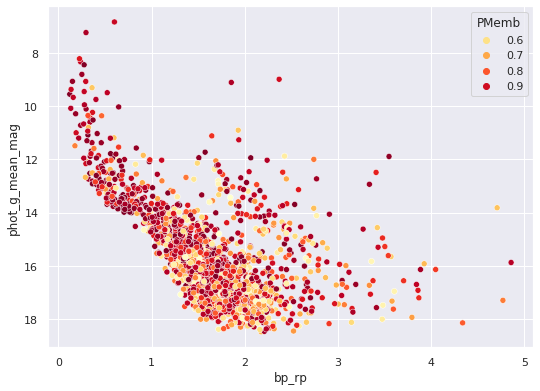

In [97]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

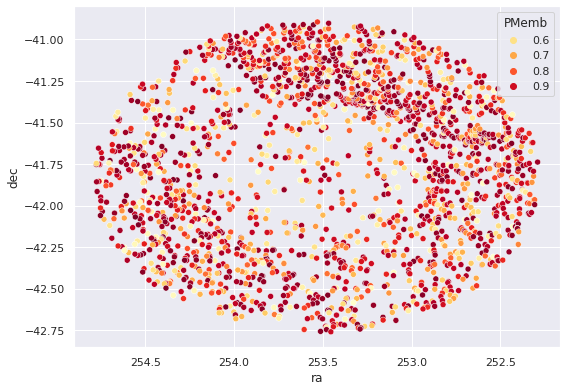

In [98]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

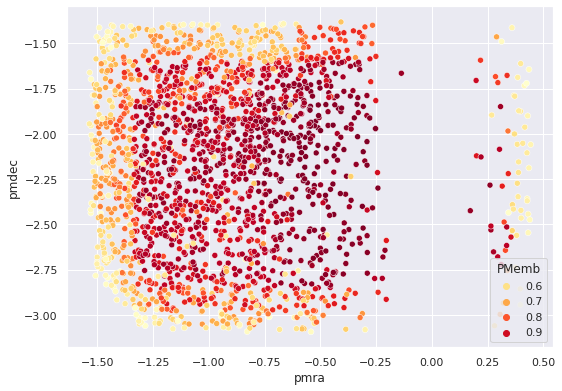

In [99]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


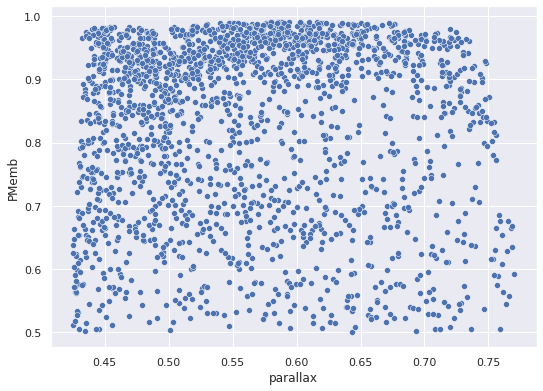

In [100]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [101]:
# saving the files as csv
# all_stars.to_csv('gaia_6231_membership_prob.csv')

potentialMember.to_csv('NGC_6231_membership_prob.csv')


### Comparing the old and new predicted members

In [102]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [103]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member,PMemb
count,3.020000e+03,3.020000e+03,3.020000e+03,3020.0,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.0,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,...,2998.000000,2998.000000,2998.000000,3020.000000,2998.000000,2998.000000,2998.000000,58.000000,58.000000,3020.000000,58.000000,58.000000,58.000000,3020.000000,3020.000000,3020.000000,3020.000000,2438.000000,2438.000000,2438.000000,2438.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,1744.0,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.0,3020.000000
mean,1.635721e+18,5.967185e+18,8.594051e+08,2015.5,253.476742,0.070361,-41.766568,0.057668,0.570294,0.078041,9.623005,-0.857306,0.143525,-2.180893,0.100437,0.037375,-0.179467,-0.380233,-0.065455,-0.223574,0.016892,-0.737126,-0.130753,0.318556,-0.054624,206.515232,23.734768,205.031788,1.483444,1.540589,252.109421,0.084145,1.352925,31.0,46.598793,1.476178,0.013555,0.084254,23.572517,11.287417,...,457.408661,14.558424,1.333657,0.114570,1.544609,0.722626,0.821985,-26.843379,1.656673,0.089404,4810.344727,3.086207,-0.025862,343.478021,1.257804,257.029948,-19.069196,100077.418376,4916.557617,4715.388672,5236.363770,1.912943,1.610428,2.225443,0.961174,0.802830,1.123424,200111.0,3.573914,3.161273,3.876417,32.493938,27.980785,37.007114,0.524702,7.481458,28.476695,0.524719,1.0,0.746750
std,0.000000e+00,1.440324e+15,4.803003e+08,0.0,0.550323,0.038261,0.419132,0.030848,0.084291,0.042292,5.194692,0.378972,0.083020,0.422923,0.054824,0.185721,0.153373,0.166827,0.167066,0.157454,0.177647,0.072698,0.124968,0.136069,0.215996,26.619709,67.073982,26.240921,2.408042,5.131398,188.019318,0.141883,4.828100,0.0,86.849106,0.111765,0.007660,0.050777,3.032075,0.811992,...,362.033173,1.754877,0.117181,0.335766,0.634734,0.382203,0.268642,33.292824,3.048630,0.717883,427.432007,0.298210,0.196960,0.400579,0.428493,0.438048,0.415510,383.180995,1233.520264,1193.014404,1251.560181,0.714865,0.737351,0.725063,0.364632,0.372728,0.373323,0.0,4.147246,3.772682,4.425808,317.506653,271.615753,363.522400,0.271986,4.199932,15.286676,0.271990,0.0,0.247826
min,1.635721e+18,5.964911e+18,1.993672e+06,2015.5,252.290455,0.021023,-42.759044,0.018408,0.425329,0.023862,3.001416,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.854753,-0.822692,-0.826485,-0.978367,-0.747989,-0.3339

In [104]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,9.810000e+02,9.810000e+02,9.810000e+02,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,975.000000,975.000000,975.000000,981.000000,975.000000,975.000000,975.000000,9.000000,9.000000,981.000000,9.000000,9.000000,9.000000,981.000000,981.000000,981.000000,981.000000,855.000000,855.000000,855.000000,855.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,695.0,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,1.635721e+18,5.966748e+18,8.652417e+08,2015.5,253.521934,0.058585,-41.788717,0.049121,0.586136,0.067603,11.212946,-0.718338,0.119377,-2.191056,0.085998,0.054932,-0.183105,-0.345898,-0.081842,-0.274248,0.016880,-0.732198,-0.149305,0.363582,-0.047871,208.194699,41.877676,206.264016,1.930683,1.839809,266.675720,0.069794,1.188554,31.0,76.657822,1.509613,0.011632,0.091111,23.763507,11.287462,...,532.041321,13.895763,1.313738,0.132518,1.362973,0.624728,0.738244,-40.064345,2.654596,0.053007,4944.444336,3.055556,-0.166667,343.483047,1.218310,257.068101,-19.086473,100092.362573,5338.688965,5112.984863,5677.572754,1.787058,1.476716,2.084814,0.898239,0.738097,1.051885,200111.0,3.624494,3.232256,3.924859,59.072506,51.042259,67.102707,0.213207,7.321942,32.893158,0.568909,0.213225,1.0
std,0.000000e+00,1.046724e+15,4.754798e+08,0.0,0.213898,0.031572,0.190065,0.026230,0.074388,0.038268,5.302892,0.291821,0.071913,0.311168,0.048582,0.176350,0.153910,0.171048,0.148750,0.146481,0.157234,0.077975,0.122019,0.121895,0.215260,29.180400,85.495801,28.546429,3.030001,5.864827,226.340103,0.133284,4.862019,0.0,108.574928,0.127500,0.006817,0.053900,3.316184,0.861261,...,413.106323,1.947901,0.126057,0.353947,0.702157,0.409019,0.308357,43.334732,4.961407,0.602074,634.647766,0.166667,0.500000,0.166179,0.184263,0.172635,0.186925,417.513729,1405.713867,1360.727905,1439.526123,0.742497,0.764570,0.755237,0.376365,0.386449,0.386517,0.0,4.075085,3.747126,4.311942,457.660889,392.118591,523.401550,0.132596,3.652877,15.635586,0.318833,0.132616,0.0
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.277864,0.018408,0.425329,0.023862,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.854753,-0.750324,-0.826485,-0.971674,-0.709552,-0.185073,-0.868255,66.000000,0.000000,66.000000,0.000000,-7.957855,64.77191

In [105]:
concatenated.dataset.value_counts()

New_member    2039
Old_member     981
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

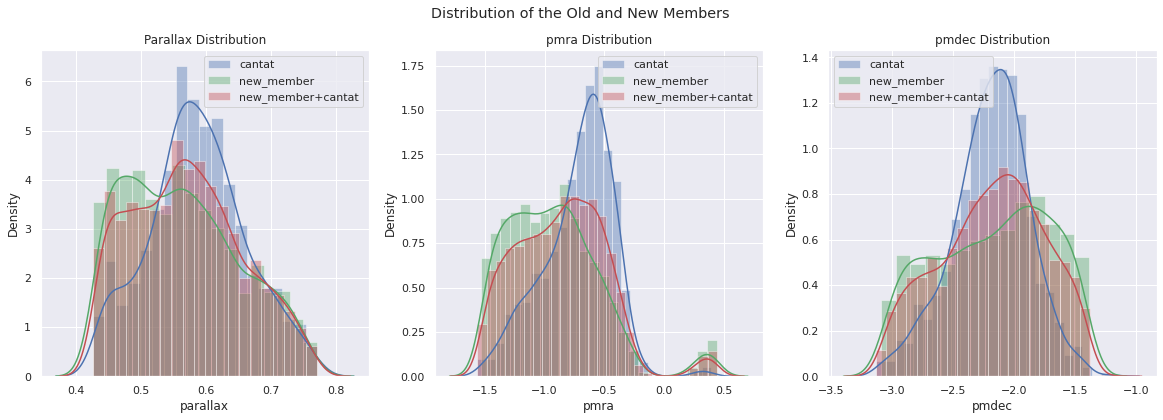

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


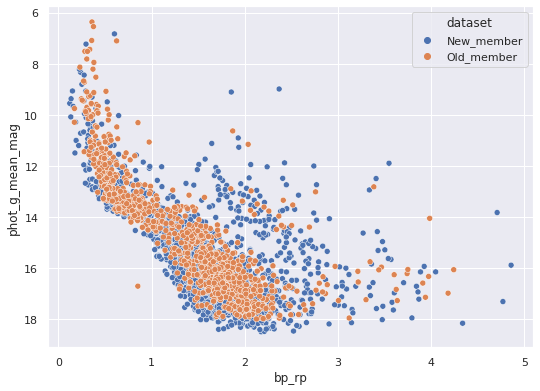

In [107]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

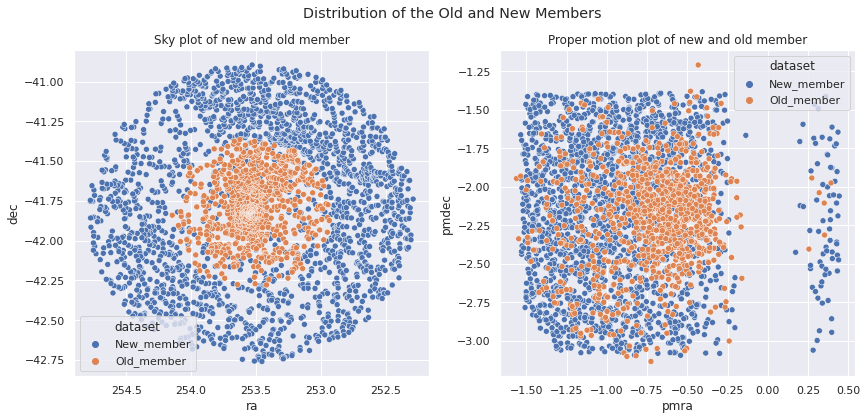

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

plt.show()

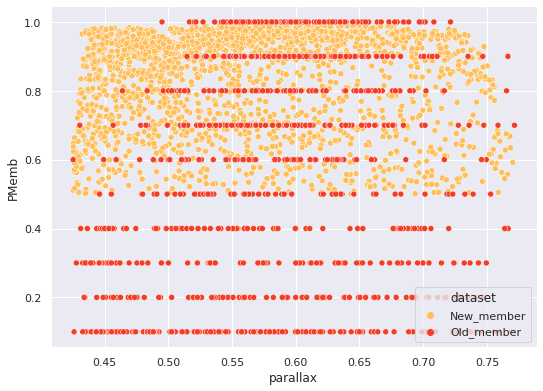

In [109]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [110]:
# pd_prof.ProfileReport(potentialMember)

In [111]:
#files.download('NGC_6231_cantat.csv')

#files.download('NGC_6231_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


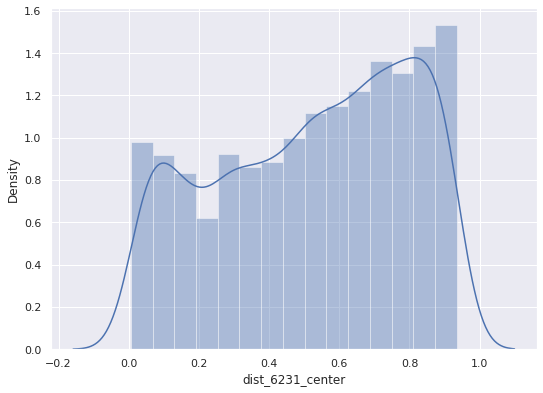

In [112]:
sns.distplot(concatenated['dist_6231_center'])

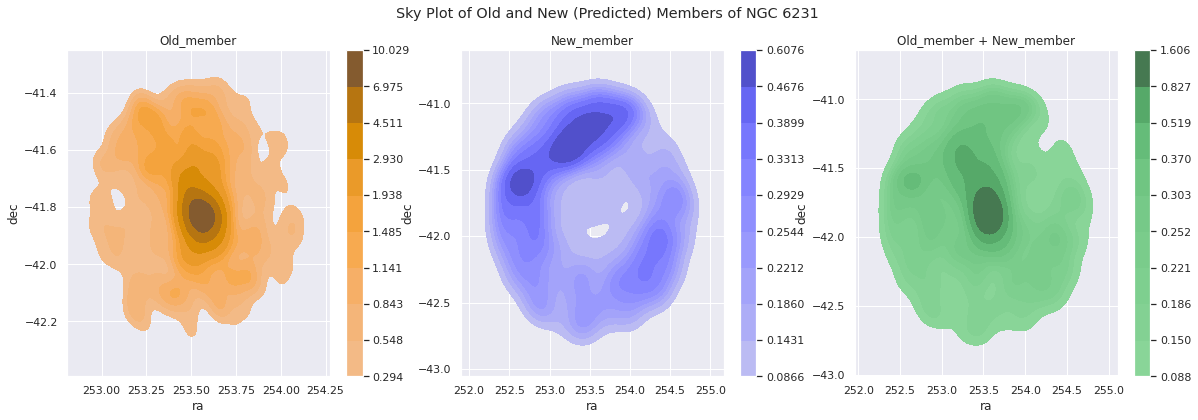

In [113]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 6231')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

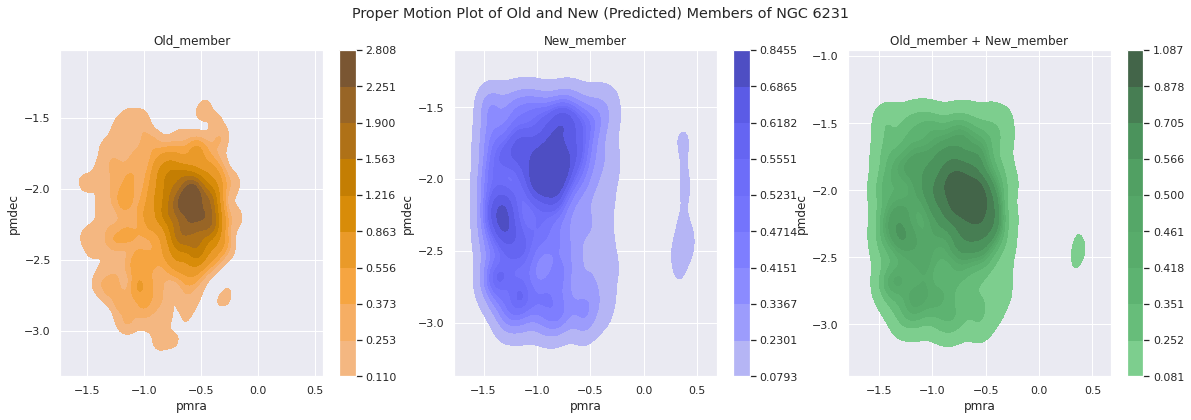

In [114]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 6231')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [114]:
#files.download('NGC_6231_cantat.csv')

potentialMember.to_csv('NGC_6231_additional_member_prob.csv')
concatenated.to_csv('NGC_6231_all_member_prob.csv')

files.download('NGC_6231_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_6231_additional_member_prob.csv')
